In [2]:
def parse(input):
  lines = [l.strip().split(' -> ') for l in open(input, 'r').readlines()]
  lines = [(l[0][1:], (l[0][0], l[1].split(', '))) for l in lines]
  return dict(lines)

parse('sample')

{'roadcaster': ('b', ['a', 'b', 'c']),
 'a': ('%', ['b']),
 'b': ('%', ['c']),
 'c': ('%', ['inv']),
 'inv': ('&', ['a'])}

In [34]:
def run(input, state, steps = 1000):
  low = 0
  high = 0
  for _ in range(steps):
    queue = [('button', 'low', 'roadcaster')]
    while queue:
      source, pulse, target = queue.pop(0)

      if source == 'qm' and target == 'kk' and pulse == 'low':
        print('found')

      if source == 'kk' and target == 'tj' and pulse == 'high':
        print('alsofound')

      if pulse == 'low':
        low += 1
      else:
        high += 1

      if target not in input:
        continue

      module_type, outputs = input[target]

      if module_type == 'b':
        for output in outputs:
          queue.append((target, pulse, output))
      if module_type == '%':
        if pulse == 'low':
          state[target] = not state[target]
          for output in outputs:
            queue.append((target, 'high' if state[target] else 'low', output))
      if module_type == '&':
        state[target][source] = pulse
        for output in outputs:
          queue.append((target, 'low' if all(pulse == 'high' for pulse in state[target].values()) else 'high', output))
  
  return low * high

def first_part(input):
  state = dict()

  for k, v in input.items():
    if v[0] == '%':
      state[k] = False
    elif v[0] == '&':
      state[k] = dict((kk, 'low') for kk, vv in input.items() if k in vv[1])

  return run(input, state)

assert first_part(parse('sample')) == 32000000
assert first_part(parse('sample2')) == 11687500
first_part(parse('input'))

818649769

In [35]:
from time import sleep
from ipycanvas import Canvas, hold_canvas

def animate(input):
  state = dict()

  for k, v in input.items():
    if v[0] == '%':
      state[k] = False
    elif v[0] == '&':
      state[k] = dict((kk, 'low') for kk, vv in input.items() if k in vv[1])

  canvas = Canvas(width=1000, height=1000)
  display(canvas)

  for i in range(100):
    run(input, state, 1)
    with hold_canvas():
      canvas.clear()
      y = 10
      for k, v in sorted(state.items()):
        canvas.font = '13px serif'
        canvas.fill_style = 'black'
        canvas.fill_text(k, 10, y)

        canvas.fill_style = 'red'

        if isinstance(v, bool):
          canvas.fill_style = 'green' if v else 'red'
          canvas.fill_rect(40, y - 10, 10, 10)
        else:
          for i, w in enumerate(v):
            canvas.fill_style = 'green' if v[w] == 'high' else 'red'
            canvas.fill_rect(40 + i * 15, y - 10, 10, 10)
        y += 16
    sleep(0.02)

animate(parse('input'))

Canvas(height=1000, width=1000)

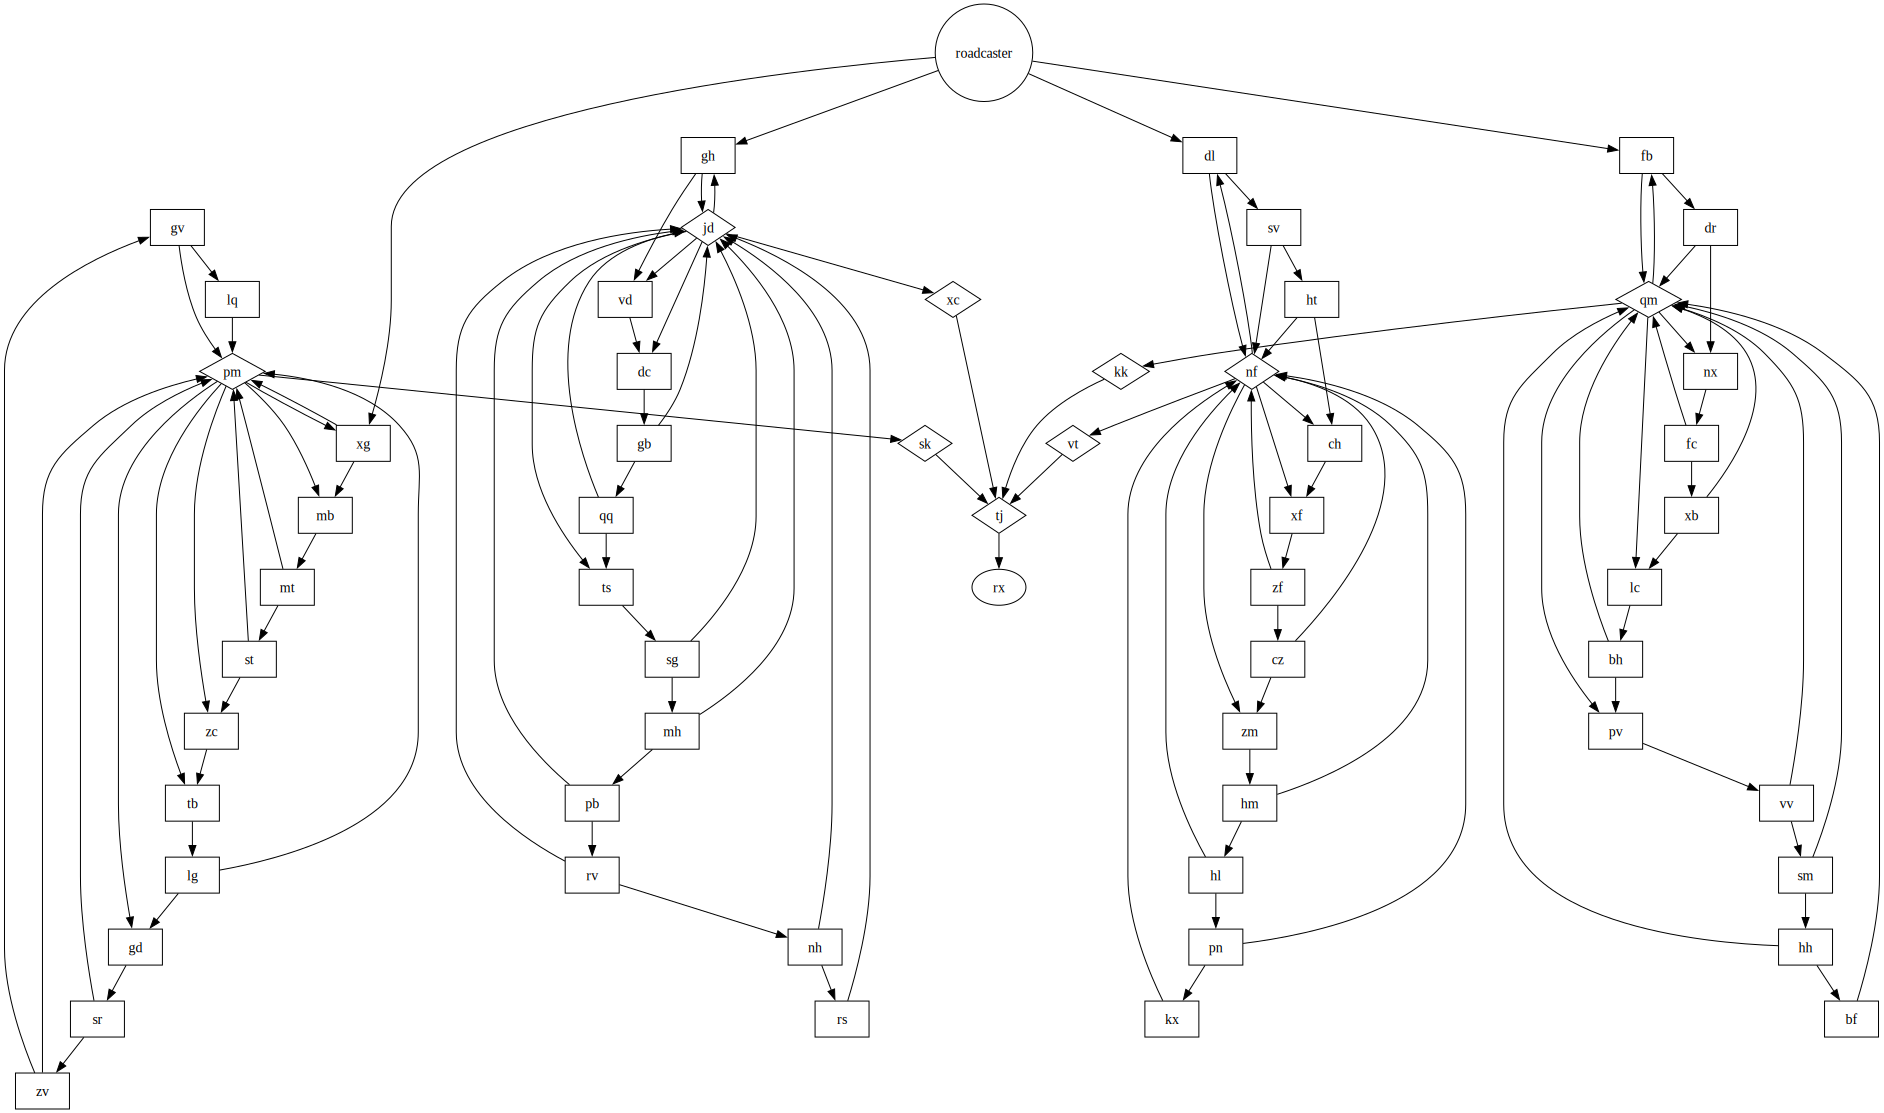

In [36]:
from graphviz import Digraph

def render(input):
  g = Digraph()
  for k, v in input.items():
    if v[0] == '%':
      g.node(k, shape='box')
    elif v[0] == '&':
      g.node(k, shape='diamond')
    else:
      g.node(k, shape='circle')

    for kk in v[1]:
      g.edge(k, kk)
  
  return g

render(parse('input'))

In [9]:
from functools import reduce

def run(input, state, stop):
  for i in range(1000000):
    queue = [('button', 'low', 'roadcaster')]
    while queue:
      source, pulse, target = queue.pop(0)

      if (source, pulse, target) == stop:
        return i + 1
      
      if target not in input:
        continue

      module_type, outputs = input[target]

      if module_type == 'b':
        for output in outputs:
          queue.append((target, pulse, output))
      if module_type == '%':
        if pulse == 'low':
          state[target] = not state[target]
          for output in outputs:
            queue.append((target, 'high' if state[target] else 'low', output))
      if module_type == '&':
        state[target][source] = pulse
        for output in outputs:
          queue.append((target, 'low' if all(pulse == 'high' for pulse in state[target].values()) else 'high', output))

def gcd(a, b):
  """greatest common divisor"""
  while b:
    a, b = b, a % b
  return a

def lcm(nums):
  """least common multiple"""
  return reduce(lambda a, b: a * b // gcd(a, b), nums)

def create_state(input):
  state = dict()

  for k, v in input.items():
    if v[0] == '%':
      state[k] = False
    elif v[0] == '&':
      state[k] = dict((kk, 'low') for kk, vv in input.items() if k in vv[1])
  
  return state

def second_part(input):
  return lcm([run(input, create_state(input), (source, 'high', 'tj')) for source in ['vt', 'kk', 'xc', 'sk']])

second_part(parse('input'))

246313604784977